In [84]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [10]:
# import pandas_datareader as pdr
# start = '2010-01-01'
# end = '2012-12-31'
# df = pdr.DataReader('AAPL', 'yahoo', start, end)
# df.head()

In [14]:

import yfinance as yf

start = '2010-01-01'
end = '2019-12-31'
df = yf.download('AAPL', start=start, end=end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507528,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404014,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392177,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434673,447610800


In [17]:
df = df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2515 non-null   float64
 1   High    2515 non-null   float64
 2   Low     2515 non-null   float64
 3   Close   2515 non-null   float64
 4   Volume  2515 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 98.4 KB


In [28]:
# MA
ma_100 = df.Close.rolling(100).mean()
ma_200 = df.Close.rolling(200).mean()
ma_100.tail()

2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, dtype: float64

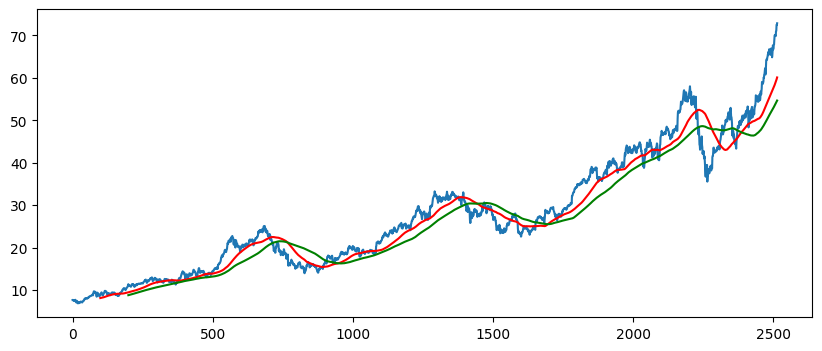

In [29]:
plt.figure(figsize=(10,4))
plt.plot(df.Close)
plt.plot(ma_100,'r')
plt.plot(ma_200,'g')
plt.show()

In [43]:
# Train Test split

train = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
test = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(train.shape)
print(test.shape)

(1760, 1)
(755, 1)


In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [44]:
train_array = scaler.fit_transform(train)
train_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [45]:
x_train = []
y_train = []

for i in range(100,train_array.shape[0]):
    x_train.append(train_array[i-100:i])
    y_train.append(train_array[i,0])
    
x_train,y_train = np.array(x_train) ,np.array(y_train)   

In [48]:
# ML model
from keras.layers import Dense,LSTM,Dropout
from keras.models import Sequential


In [55]:
model = Sequential()
model.add(LSTM(units = 50 , activation = 'relu' , return_sequences = True ,input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60 , activation = 'relu' , return_sequences = True ))
model.add(Dropout(0.3))

model.add(LSTM(units = 80 , activation = 'relu' , return_sequences = True ))
model.add(Dropout(0.4))

model.add(LSTM(units = 120 , activation = 'relu'  ))
model.add(Dropout(0.5))

model.add(Dense(units=1))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_16 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_17 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_17 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_18 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_18 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_19 (LSTM)              (None, 120)              

In [58]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [59]:
model.fit(x_train,y_train,epochs = 25)

Epoch 1/25
52/52 [==============================] - 28s 343ms/step - loss: 0.0627
Epoch 2/25
52/52 [==============================] - 18s 339ms/step - loss: 0.0126
Epoch 3/25
52/52 [==============================] - 18s 341ms/step - loss: 0.0114
Epoch 4/25
52/52 [==============================] - 18s 342ms/step - loss: 0.0101
Epoch 5/25
52/52 [==============================] - 18s 345ms/step - loss: 0.0094
Epoch 6/25
52/52 [==============================] - 18s 345ms/step - loss: 0.0088
Epoch 7/25
52/52 [==============================] - 18s 348ms/step - loss: 0.0081
Epoch 8/25
52/52 [==============================] - 18s 347ms/step - loss: 0.0080
Epoch 9/25
52/52 [==============================] - 18s 341ms/step - loss: 0.0073
Epoch 10/25
52/52 [==============================] - 18s 345ms/step - loss: 0.0072
Epoch 11/25
52/52 [==============================] - 15s 294ms/step - loss: 0.0076
Epoch 12/25
52/52 [==============================] - 17s 318ms/step - loss: 0.0066
Epoch 13/25
5

In [60]:
model.save('keras_model.h5')

In [61]:
test.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [62]:
past_100_days = train.tail(100)

In [63]:
final_df = past_100_days.append(test,ignore_index = True)

C:\Users\91700\AppData\Local\Temp\ipykernel_22148\3789311313.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(test,ignore_index = True)


In [64]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [68]:
input_data = scaler.fit_transform(final_df)
input_data.shape

(855, 1)

In [73]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [76]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [77]:
y_predicted = model.predict(x_test)

24/24 [==============================] - 4s 124ms/step


In [78]:
y_predicted.shape

(755, 1)

In [79]:
scaler.scale_

array([0.02123255])

In [81]:
scale_factor = 1/0.02123255
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

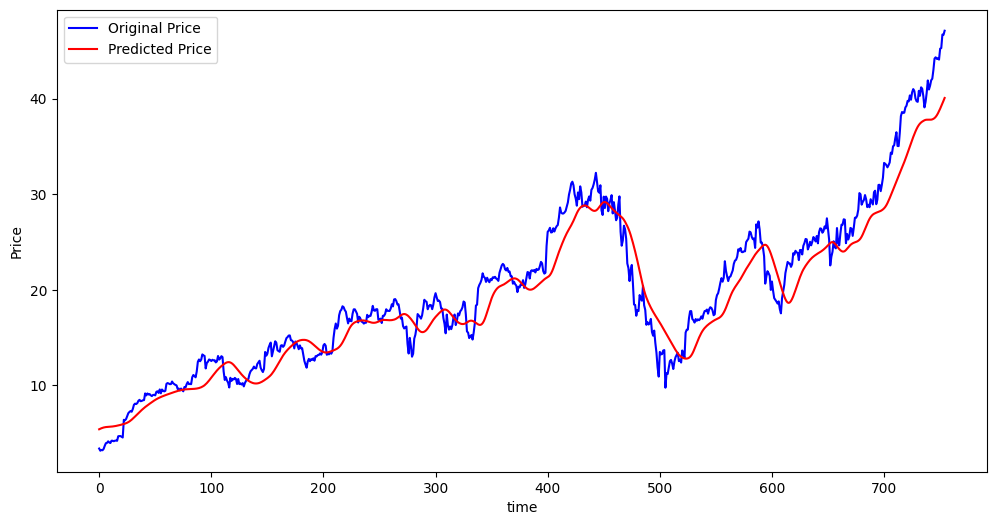

In [83]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_predicted,'r',label = 'Predicted Price')
plt.xlabel('time')
plt.ylabel('Price')
plt.legend()

plt.show()


In [85]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\dropout_2
......vars
...layers\dropout_3
......vars
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\lstm_1
......vars
...layers\lstm_1\cell
......vars
.........0
.........1
.........2
...layers\lstm_2
......vars
...layers\lstm_2\cell
......vars
.........0
.........1
.........2
...layers\lstm_3
......vars
...layers\lstm_3\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........23
.........24
.........25
.........26
.........27
.........28
.........3
.........4
.........5
.........6
.........7
..